# 모듈 

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 6.7 MB/s 
     |████████████████████████████████| 1.2 MB 65.0 MB/s 
     |████████████████████████████████| 365 kB 72.8 MB/s 
     |████████████████████████████████| 4.4 MB 59.9 MB/s 
     |████████████████████████████████| 140 kB 67.0 MB/s 
     |████████████████████████████████| 1.1 MB 66.6 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 212 kB 70.3 MB/s 
     |████████████████████████████████| 596 kB 72.2 MB/s 
     |████████████████████████████████| 127 kB 76.4 MB/s 
     |████████████████████████████████| 271 kB 68.4 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 70.7 MB/s 
     |████████████████████████████████| 6.6 MB 51.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10

In [ ]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# 데이터 배열화


In [ ]:
# MNIST Dataset download

path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [ ]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
threes =(path/'train'/'3').ls().sorted()
sevens =(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path) # Image.open => PIL library
im3

In [ ]:
# 넘파이의 배열을 사용하여 숫자를 확인하거나,
array(im3)[4:10, 4:10]

# pytorch의 tensor을 사용한다.
tensor(im3)[4:10, 4:10]

# 이때 숫자는 0 ~ 255까지 채도? 명도? 를 나타낸다.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
# pandas 라이브러리를 통해 픽셀값에 맞춰 잘라낸 후 색상을 그라데이션 형태로 입힌다.
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
# 모든 자료들을 텐서로 저장
# * 리스트 컴프리헨션 학습 할 것
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

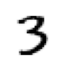

In [ ]:
# 이미지 출력
show_image(three_tensors[1]) # PIL library?

In [ ]:
# 스택과 동시에 부동소수로 표현
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape 
# shape는 축의 크기, rank 는 축의 갯수

torch.Size([6131, 28, 28])

In [ ]:
stacked_threes.ndim
# 3차원 형태

3

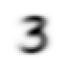

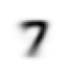

In [ ]:
# 쌓아 올린 텐서들을 가지고 해당 픽셀의 평균값을 구한 뒤 하나의 이미지로 새롭게 정의한다.

# 모든 3의 픽셀값에 따른 평균 이미지 재해석
mean3 = stacked_threes.mean(0) # <- 왜 함수의 인자로 0이 들어가는가? 1, 2, -1 다 안됨
show_image(mean3)

# 모든 7의 텐서의 픽셀값에 따른 평균 이미지 재해석
mean7 = stacked_sevens.mean(0)
show_image(mean7)

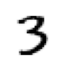

In [ ]:
# 차이의 절댓값에 대한 평균 : L1 노름, 평균절대차
# 차이의 제곱에 대한 절댓값 후 제곱근 : L2 노름, 평균제곱근오차

a_3 = stacked_threes[1]
show_image(a_3)

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean() # absolute
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() # squared
dist_3_abs, dist_3_sqr

# (tensor(0.1114), tensor(0.2021))

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

# (tensor(0.1586), tensor(0.3021))

(tensor(0.1586), tensor(0.3021))

In [ ]:
# 손실함수로 표현하는 방법

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

# l1 손실함수, 평균제곱오차에서 제곱근 사용

(tensor(0.1586), tensor(0.3021))

# tensor과 numpy의 차이?

* 기본적으로 numpy는 c언어를 기반으로 만들어졌기 때문에 다양한 형태의 데이터를 담을 수 있고, 자료형만 같다면 다양한 모습으로 연산을 통해 배열을 만들 수 있다.

* numpy는 연산을 압축하여 메모리에 저장하기에 매우 빠른 속도를 자랑한다.

* tensor는 수치형 데이터만 사용할 수 있으며, 다양한 모습으로 변할 수 없어 항상 사각형을 유지해야 한다.

* 단, GPU에 연산을 맡길 수 있어 수 많은 양에 대한 연산이 매우 빠르게 적용하고, 자동으로 미분을 해주기도 한다.

In [ ]:
data = [[12, 35, 32], [10, 39, 20]]
arr = array(data)
tns = tensor(data)

arr 
# array([[12, 35, 32], [10, 39, 20]])

tns
# tensor([[12, 35, 32], [10, 39, 20]])

tensor([[12, 35, 32],
        [10, 39, 20]])

In [ ]:
# tns[행 : 열]
tns[1] # tensor([10, 39, 20]) : 인덱스 1에 해당되는 행을 들고온다. 2행

tns[:, 0] # tensor([12, 10]) : 인덱스 0에 해당되는 열을 들고온다. 모든 행에 대한 1열

tensor([12, 10])

# 4.3